In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Exploratory Data Analysis

### Distribution Graph of BMI

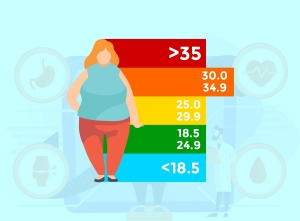

In [7]:
bmi = pd.cut(x=data['bmi'],
             bins=[15, 18, 25, 30, 35, 55]).value_counts().sort_index()

mean_charges_by_bmi = data.groupby(pd.cut(data['bmi'],
             bins = [15, 18, 25, 30, 35, 55]))['charges'].mean()

print(bmi)
print("\n")
print(mean_charges_by_bmi)

(15, 18]     15
(18, 25]    232
(25, 30]    386
(30, 35]    389
(35, 55]    316
Name: bmi, dtype: int64


bmi
(15, 18]     7576.420217
(18, 25]    10459.367815
(25, 30]    10997.803881
(30, 35]    14429.421062
(35, 55]    16953.823618
Name: charges, dtype: float64


In [8]:
charges_by_bmi = data[['bmi', 'charges']]

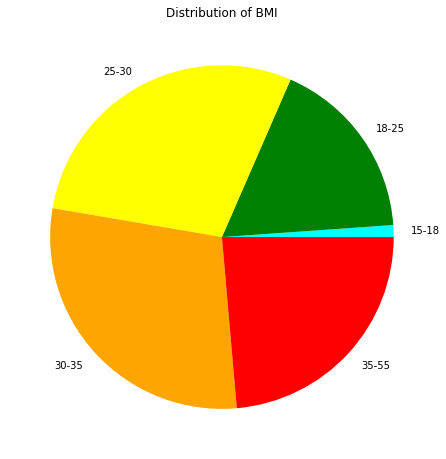

Text(0.5, 1.0, 'Avarage Medical Cost by BMI')

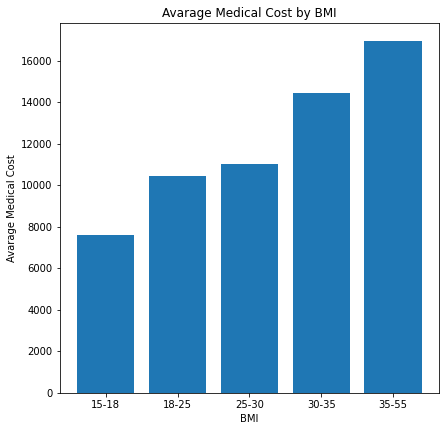

In [9]:
labels = ['15-18','18-25', '25-30', '30-35', '35-55']
plt.figure(figsize=(7.9, 7.9))
plt.pie(bmi, labels = labels, colors=['#00FFFF', 'green', 'yellow', 'orange', 'red'])
plt.title("Distribution of BMI")
plt.show()

plt.figure(figsize=(6.8, 6.8))
plt.bar(labels, mean_charges_by_bmi.values)
plt.xlabel("BMI")
plt.ylabel("Avarage Medical Cost")
plt.title("Avarage Medical Cost by BMI")

The graph shows us the correct proportion between BMI and average medical cost.

### Relation Beetween Smoker and Charges

In [10]:
avarage_smoker = data.groupby(data['smoker'])['charges'].mean()

In [11]:
avarage_smoker

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Text(0.5, 1.0, 'Avarage Medical Cost by Smoking Habit')

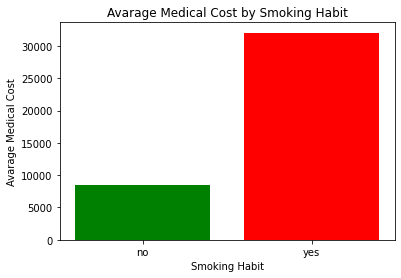

In [12]:
plt.bar(avarage_smoker.index, avarage_smoker.values, color=['green', 'red'])
plt.xlabel("Smoking Habit")
plt.ylabel("Avarage Medical Cost")
plt.title("Avarage Medical Cost by Smoking Habit")

The graph shows us people who smoke face 2.8 times more medical cost.